<a href="https://colab.research.google.com/github/mrsbelema/belema/blob/main/belema_kio_7089.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
task 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plots are displayed within the notebook
%matplotlib inline


In [ ]:
# Load the dataset
df = pd.read_csv('///content/gene_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Print the column names
print(df.columns)



     0  1.050777626  0.565836395  0.970966022  0.564797353  0.482205383
0  0.1     0.927415     0.314328     0.926647     0.644547     0.622073
1  0.2     0.920302     0.322418     0.912583     0.807286     0.680840
2  0.3     0.780651     0.456490     0.868285     0.882913     0.877914
3  0.4     0.804124     0.586241     0.915385     0.955537     0.921647
4  0.5     0.814302     0.554609     0.882978     0.947855     1.025591
Index(['0', '1.050777626', '0.565836395', '0.970966022', '0.564797353',
       '0.482205383'],
      dtype='object')


In [ ]:
# Define the columns for time and genes
# Rename columns
df.columns = ['time', 'x1', 'x2', 'x3', 'x4', 'x5']

# Display the first few rows of the dataset
print(df.head())

   time        x1        x2        x3        x4        x5
0   0.1  0.927415  0.314328  0.926647  0.644547  0.622073
1   0.2  0.920302  0.322418  0.912583  0.807286  0.680840
2   0.3  0.780651  0.456490  0.868285  0.882913  0.877914
3   0.4  0.804124  0.586241  0.915385  0.955537  0.921647
4   0.5  0.814302  0.554609  0.882978  0.947855  1.025591


# New section

> Add blockquote



Time series plot

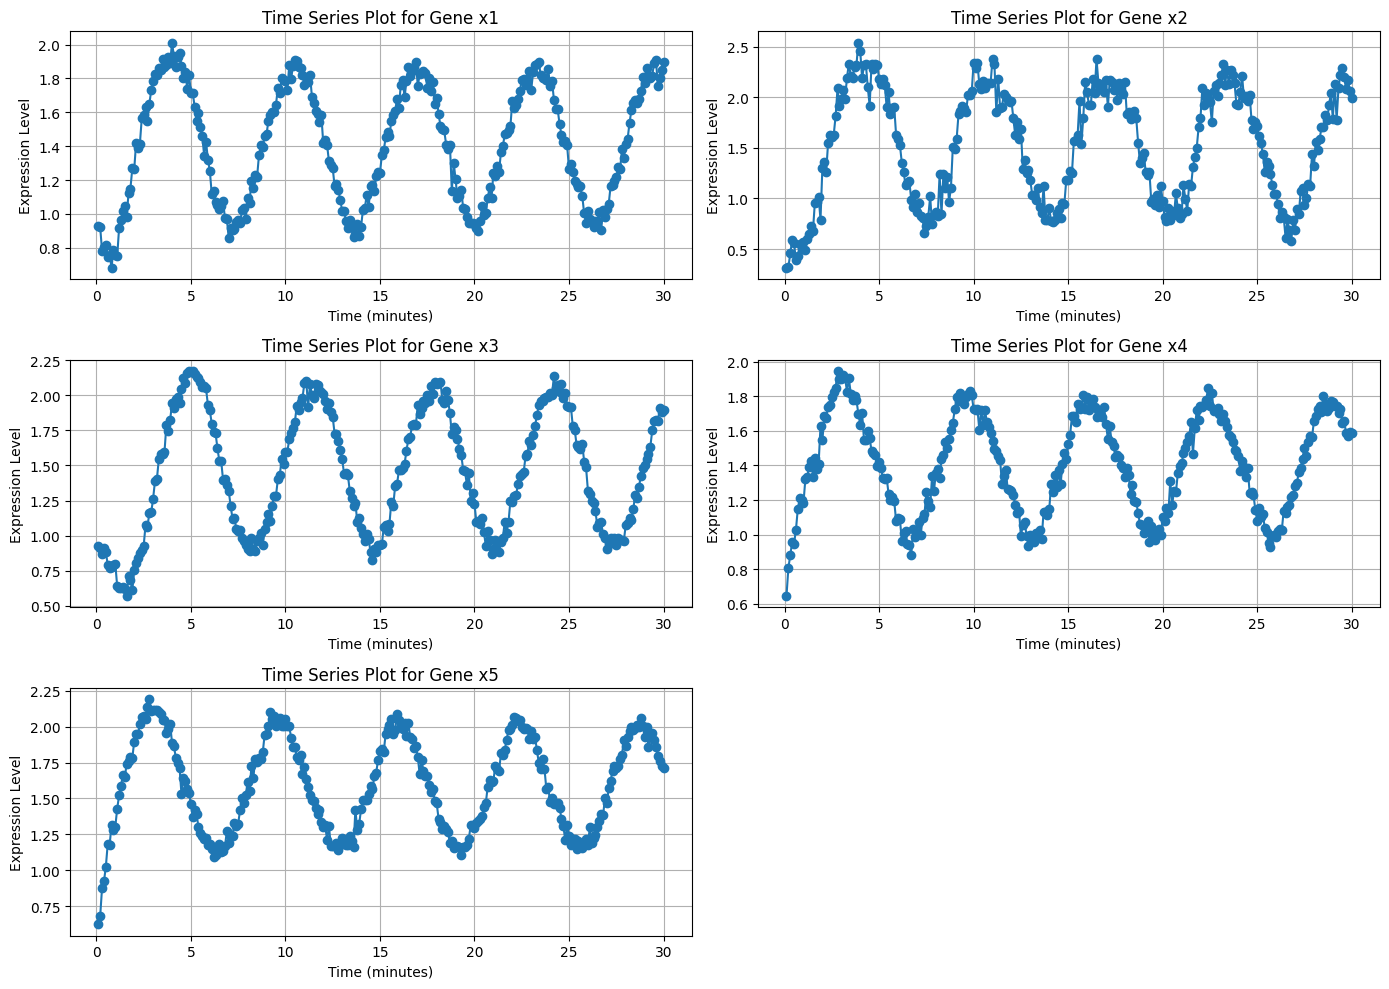

In [ ]:
plt.figure(figsize=(14, 10))

genes = ['x1', 'x2', 'x3', 'x4', 'x5']
for i, gene in enumerate(genes):
    plt.subplot(3, 2, i+1)
    plt.plot(df['time'], df[gene], marker='o')
    plt.title(f'Time Series Plot for Gene {gene}')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Expression Level')
    plt.grid(True)

plt.tight_layout()
plt.show()

Distribution for each Gene

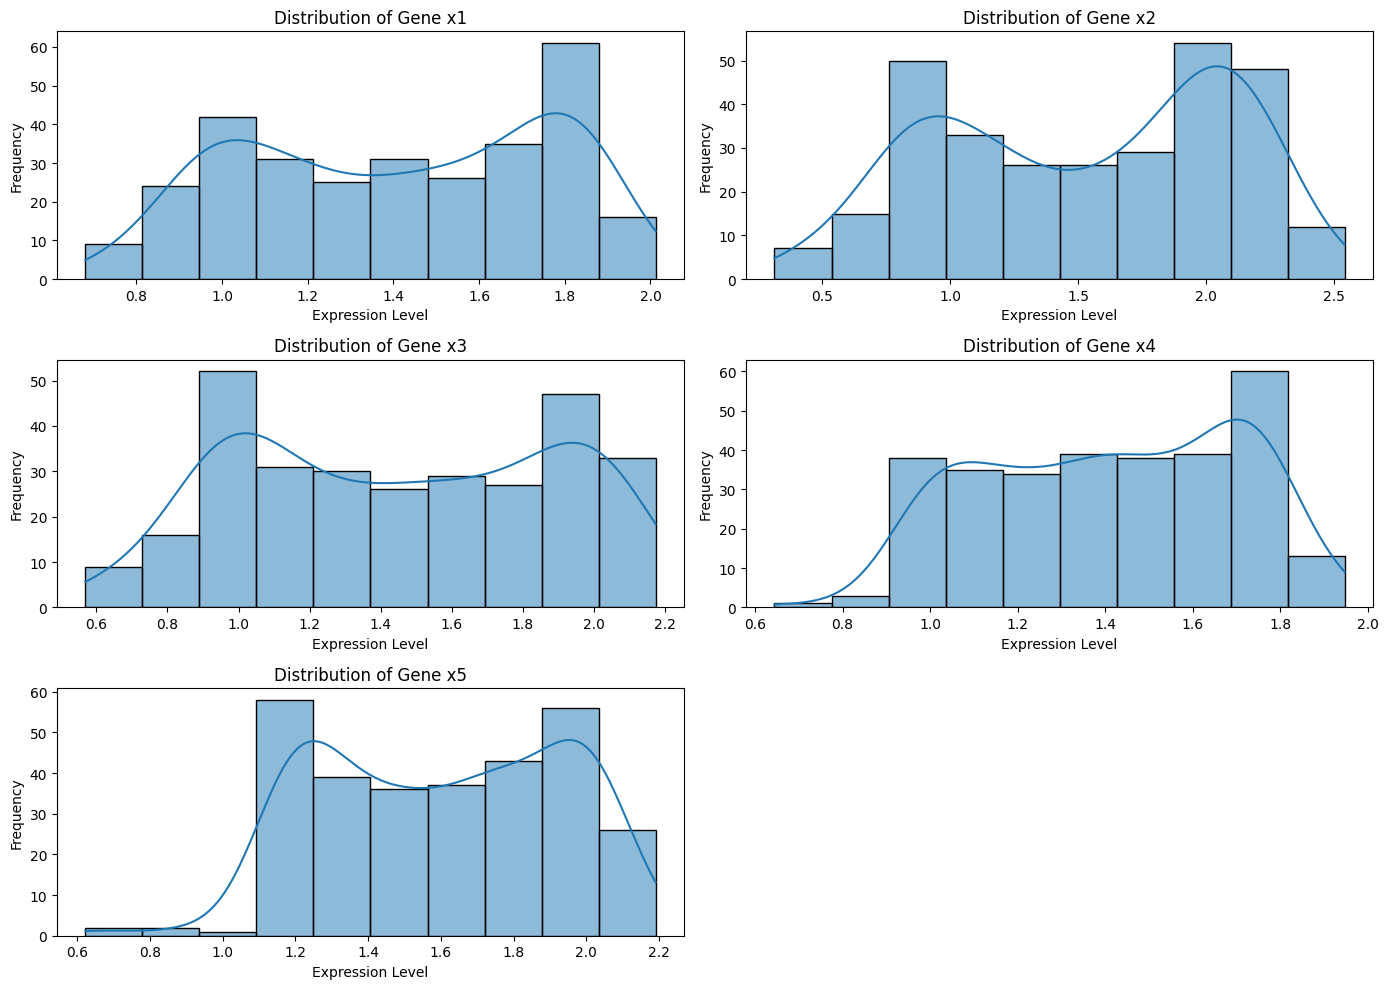

In [ ]:
# Distribution plots for each gene
plt.figure(figsize=(14, 10))

for i, gene in enumerate(genes):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[gene], kde=True)
    plt.title(f'Distribution of Gene {gene}')
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

correlation matrix

In [ ]:
# Correlation matrix
correlation_matrix = df[genes].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          x1        x2        x3        x4        x5
x1  1.000000  0.935592  0.599887  0.776839  0.675185
x2  0.935592  1.000000  0.762298  0.613526  0.517252
x3  0.599887  0.762298  1.000000  0.011024 -0.129928
x4  0.776839  0.613526  0.011024  1.000000  0.965901
x5  0.675185  0.517252 -0.129928  0.965901  1.000000


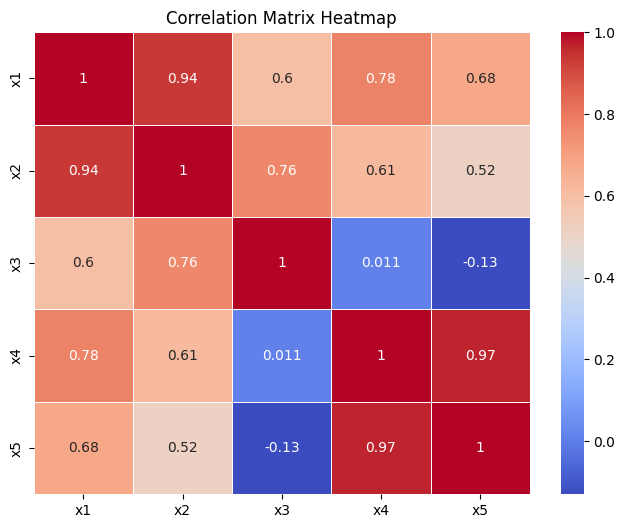

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

scatter plot

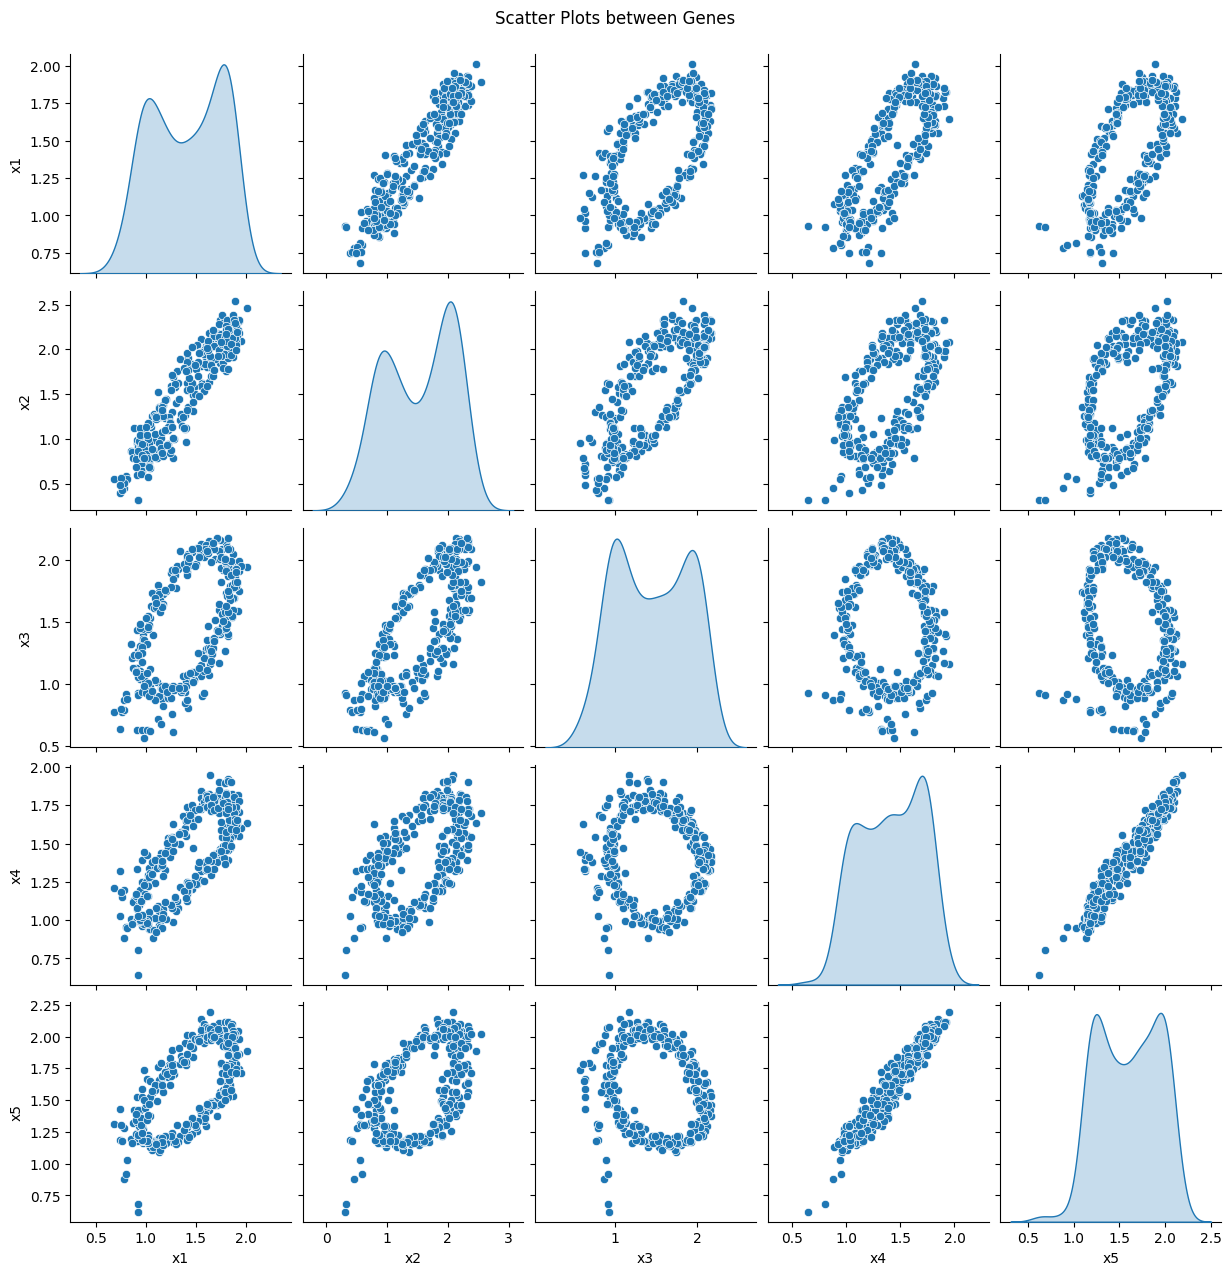

In [ ]:
# Scatter plots between different combinations of two genes
sns.pairplot(df[genes], kind='scatter', diag_kind='kde')
plt.suptitle('Scatter Plots between Genes', y=1.02)
plt.show()

Task 2.1

Step 1: Prepare the Dataset

In [ ]:
# Define input genes and output gene
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['x5']

Step 2: Define Candidate Models   
For each model, we need to create the design matrix X.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Model 1: y = θ1*x4 + θ2*x3^2 + θ_bias
X_model_1 = np.column_stack((X['x4'], X['x3']**2, np.ones(len(X))))

# Model 2: y = θ1*x4 + θ2*x3^2 + θ3*x1 + θ_bias
X_model_2 = np.column_stack((X['x4'], X['x3']**2, X['x1'], np.ones(len(X))))

# Model 3: y = θ1*x3 + θ2*x4 + θ3*x1^3
X_model_3 = np.column_stack((X['x3'], X['x4'], X['x1']**3))

# Model 4: y = θ1*x4 + θ2*x3^2 + θ3*x1^3 + θ_bias
X_model_4 = np.column_stack((X['x4'], X['x3']**2, X['x1']**3, np.ones(len(X))))

# Model 5: y = θ1*x4 + θ2*x1 + θ3*x3 + θ_bias
X_model_5 = np.column_stack((X['x4'], X['x1'], X['x3'], np.ones(len(X))))


Step 3: Estimate Parameters Using Least Squares

In [ ]:
# Function to estimate parameters using Least Squares
def estimate_parameters(X, y):
    # Compute the Least Squares solution
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Estimate parameters for each model
theta_model_1 = estimate_parameters(X_model_1, y)
theta_model_2 = estimate_parameters(X_model_2, y)
theta_model_3 = estimate_parameters(X_model_3, y)
theta_model_4 = estimate_parameters(X_model_4, y)
theta_model_5 = estimate_parameters(X_model_5, y)

# Print the estimated parameters for each model
print("Estimated parameters for Model 1:", theta_model_1)
print("Estimated parameters for Model 2:", theta_model_2)
print("Estimated parameters for Model 3:", theta_model_3)
print("Estimated parameters for Model 4:", theta_model_4)
print("Estimated parameters for Model 5:", theta_model_5)


Estimated parameters for Model 1: [ 1.10937994 -0.0384525   0.11994327]
Estimated parameters for Model 2: [ 0.88891179 -0.07581202  0.23202267  0.18998828]
Estimated parameters for Model 3: [-0.05085913  1.22075605 -0.0160156 ]
Estimated parameters for Model 4: [ 1.02094847 -0.05371769  0.01582106  0.22743813]
Estimated parameters for Model 5: [ 0.96045272  0.15983098 -0.18075365  0.27881493]


task 2.2

Residual Sum of Squares (RSS) for each candidate model

In [ ]:
import numpy as np

# Function to compute predictions using the estimated parameters
def predict(X, theta):
    return X @ theta

# Function to compute RSS
def compute_rss(y_true, y_pred):
    residuals = y_true - y_pred
    rss = np.sum(residuals ** 2)
    return rss

# Compute predictions for each model
y_pred_model_1 = predict(X_model_1, theta_model_1)
y_pred_model_2 = predict(X_model_2, theta_model_2)
y_pred_model_3 = predict(X_model_3, theta_model_3)
y_pred_model_4 = predict(X_model_4, theta_model_4)
y_pred_model_5 = predict(X_model_5, theta_model_5)

# Compute RSS for each model
rss_model_1 = compute_rss(y, y_pred_model_1)
rss_model_2 = compute_rss(y, y_pred_model_2)
rss_model_3 = compute_rss(y, y_pred_model_3)
rss_model_4 = compute_rss(y, y_pred_model_4)
rss_model_5 = compute_rss(y, y_pred_model_5)

# Print the RSS for each model
print("RSS for Model 1:", rss_model_1)
print("RSS for Model 2:", rss_model_2)
print("RSS for Model 3:", rss_model_3)
print("RSS for Model 4:", rss_model_4)
print("RSS for Model 5:", rss_model_5)

RSS for Model 1: 1.4489784346159933
RSS for Model 2: 1.3474098303548918
RSS for Model 3: 1.61816373510907
RSS for Model 4: 1.415815331200586
RSS for Model 5: 1.4887255765072671


task 2.3

log-likelihood function for each candidate model

In [ ]:
import numpy as np

# Function to compute the variance of residuals (σ^2)
def compute_residual_variance(rss, n):
    return rss / (n - 1)

# Function to compute the log-likelihood
def compute_log_likelihood(rss, n):
    sigma_squared = compute_residual_variance(rss, n)
    log_likelihood = - (n / 2) * np.log(2 * np.pi) - (n / 2) * np.log(sigma_squared) - (1 / (2 * sigma_squared)) * rss
    return log_likelihood

# Number of data samples
n = len(y)

# Compute the log-likelihood for each model
log_likelihood_model_1 = compute_log_likelihood(rss_model_1, n)
log_likelihood_model_2 = compute_log_likelihood(rss_model_2, n)
log_likelihood_model_3 = compute_log_likelihood(rss_model_3, n)
log_likelihood_model_4 = compute_log_likelihood(rss_model_4, n)
log_likelihood_model_5 = compute_log_likelihood(rss_model_5, n)

# Print the log-likelihood for each model
print("Log-likelihood for Model 1:", log_likelihood_model_1)
print("Log-likelihood for Model 2:", log_likelihood_model_2)
print("Log-likelihood for Model 3:", log_likelihood_model_3)
print("Log-likelihood for Model 4:", log_likelihood_model_4)
print("Log-likelihood for Model 5:", log_likelihood_model_5)


Log-likelihood for Model 1: 374.25615900444086
Log-likelihood for Model 2: 385.157360250201
Log-likelihood for Model 3: 357.6911746215064
Log-likelihood for Model 4: 377.7291404050236
Log-likelihood for Model 5: 370.19691061959384


task 2.4

Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for each candidate model,

In [ ]:
import numpy as np

# Number of data samples
n = len(y)

# Number of parameters for each model
k_model_1 = 3
k_model_2 = 4
k_model_3 = 3
k_model_4 = 4
k_model_5 = 4

# Function to compute AIC
def compute_aic(log_likelihood, k):
    return 2 * k - 2 * log_likelihood

# Function to compute BIC
def compute_bic(log_likelihood, k, n):
    return k * np.log(n) - 2 * log_likelihood

# Compute AIC for each model
aic_model_1 = compute_aic(log_likelihood_model_1, k_model_1)
aic_model_2 = compute_aic(log_likelihood_model_2, k_model_2)
aic_model_3 = compute_aic(log_likelihood_model_3, k_model_3)
aic_model_4 = compute_aic(log_likelihood_model_4, k_model_4)
aic_model_5 = compute_aic(log_likelihood_model_5, k_model_5)

# Compute BIC for each model
bic_model_1 = compute_bic(log_likelihood_model_1, k_model_1, n)
bic_model_2 = compute_bic(log_likelihood_model_2, k_model_2, n)
bic_model_3 = compute_bic(log_likelihood_model_3, k_model_3, n)
bic_model_4 = compute_bic(log_likelihood_model_4, k_model_4, n)
bic_model_5 = compute_bic(log_likelihood_model_5, k_model_5, n)

# Print the AIC and BIC for each model
print("AIC for Model 1:", aic_model_1)
print("AIC for Model 2:", aic_model_2)
print("AIC for Model 3:", aic_model_3)
print("AIC for Model 4:", aic_model_4)
print("AIC for Model 5:", aic_model_5)

print("BIC for Model 1:", bic_model_1)
print("BIC for Model 2:", bic_model_2)
print("BIC for Model 3:", bic_model_3)
print("BIC for Model 4:", bic_model_4)
print("BIC for Model 5:", bic_model_5)


AIC for Model 1: -742.5123180088817
AIC for Model 2: -762.314720500402
AIC for Model 3: -709.3823492430128
AIC for Model 4: -747.4582808100472
AIC for Model 5: -732.3938212391877
BIC for Model 1: -731.4009705849131
BIC for Model 2: -747.4995906017772
BIC for Model 3: -698.2710018190442
BIC for Model 4: -732.6431509114224
BIC for Model 5: -717.5786913405628


task 2.5

distribution of model prediction errors (residuals)

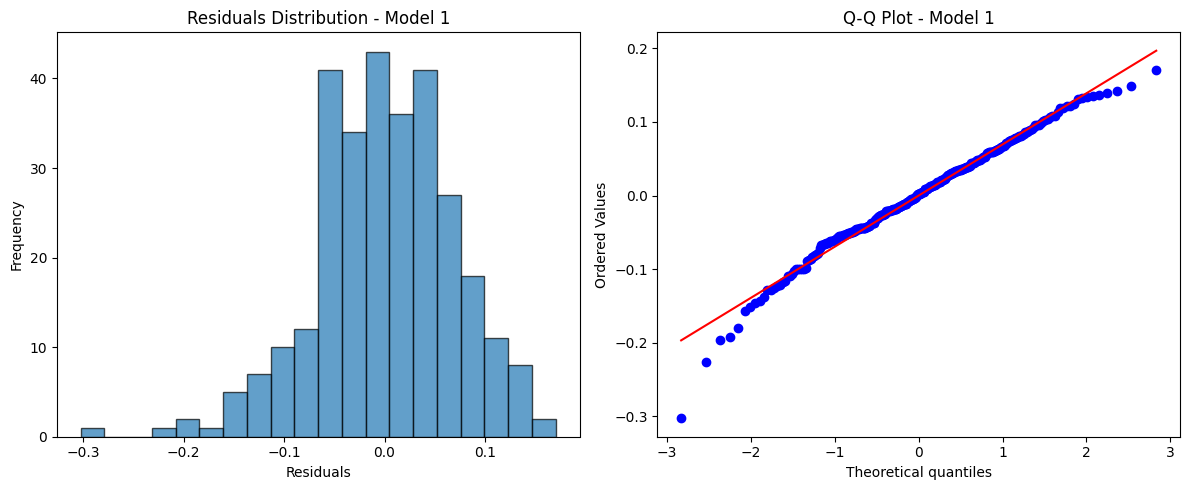

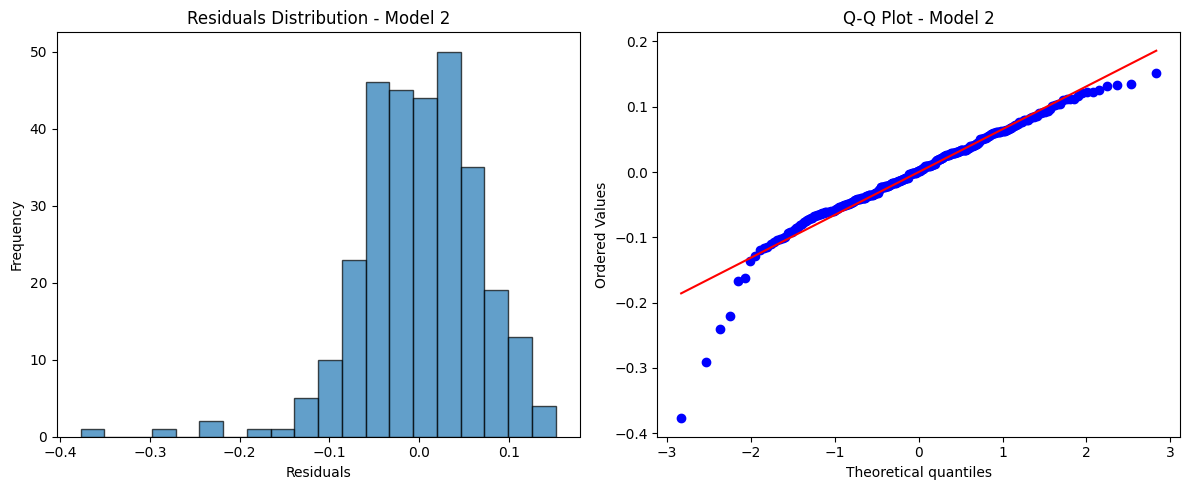

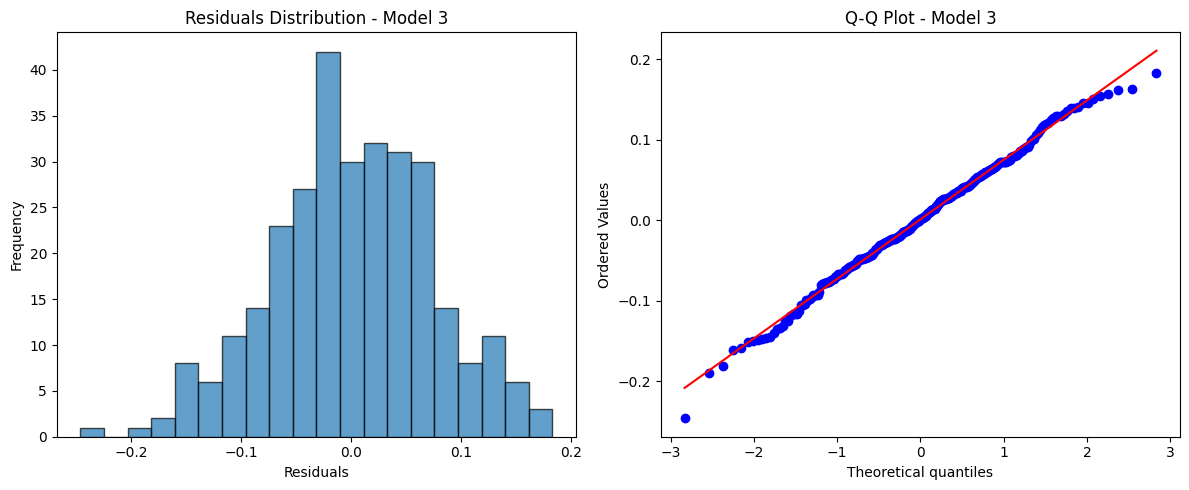

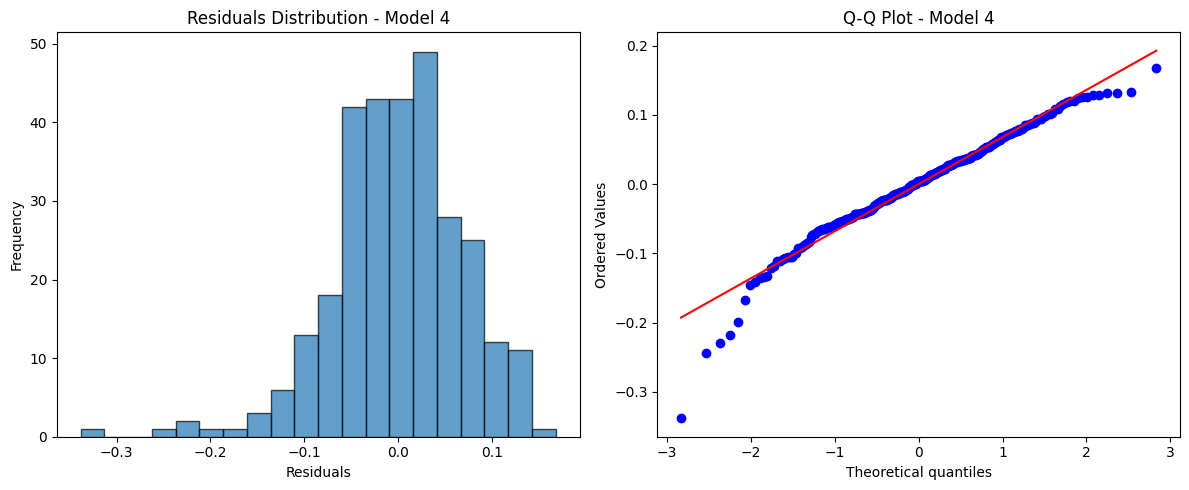

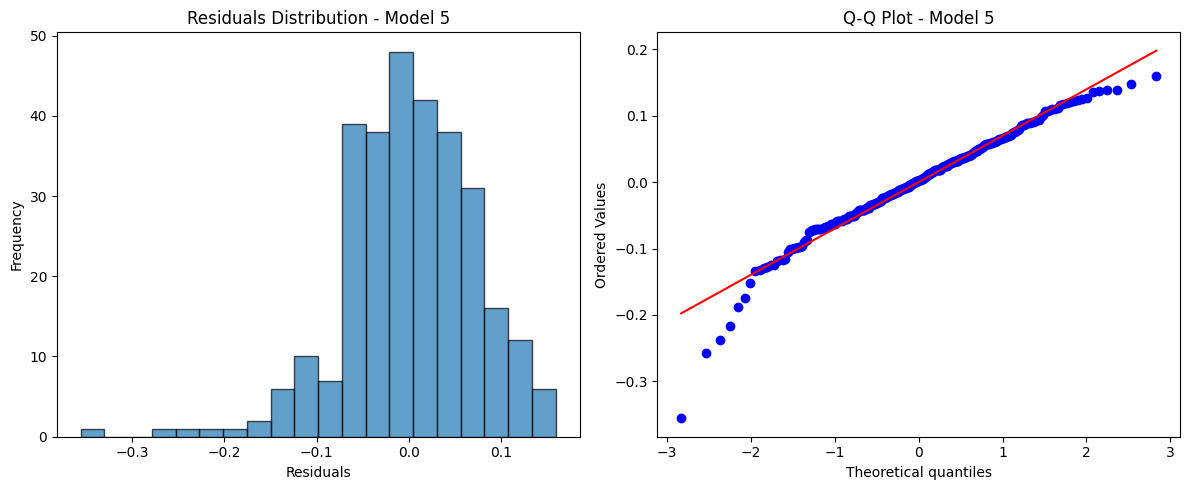

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to compute residuals
def compute_residuals(y_true, y_pred):
    return y_true - y_pred

# Function to plot residuals and Q-Q plot
def plot_residuals(y_true, y_pred, model_name):
    residuals = compute_residuals(y_true, y_pred)

    # Plot histogram of residuals
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Residuals Distribution - {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - {model_name}')

    plt.tight_layout()
    plt.show()

# Compute residuals for each model
residuals_model_1 = compute_residuals(y, y_pred_model_1)
residuals_model_2 = compute_residuals(y, y_pred_model_2)
residuals_model_3 = compute_residuals(y, y_pred_model_3)
residuals_model_4 = compute_residuals(y, y_pred_model_4)
residuals_model_5 = compute_residuals(y, y_pred_model_5)

# Plot residuals and Q-Q plot for each model
plot_residuals(y, y_pred_model_1, 'Model 1')
plot_residuals(y, y_pred_model_2, 'Model 2')
plot_residuals(y, y_pred_model_3, 'Model 3')
plot_residuals(y, y_pred_model_4, 'Model 4')
plot_residuals(y, y_pred_model_5, 'Model 5')


task 2.6

Split the Dataset into Training and Testing Sets


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are my input and output gene datasets respectively

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Selected 'Best' Model

task 2.7

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Assuming Model 2 structure: y = theta1*x4 + theta2*x3^2 + theta3*x1 + theta_bias

# Create a Polynomial Regression model (Model 2)
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model using the training data
model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

 Compute Model Predictions on the Testing Data

In [ ]:
# Predict on the testing data
y_pred = model.predict(X_test)


 Compute 95% Confidence Intervals for Model Predictions

In [ ]:
from scipy.stats import t

# Calculate standard error of the predictions
y_pred_std = np.std(y_pred - y_test) / np.sqrt(len(y_pred))

# Compute t-score for 95% confidence interval (two-tailed)
t_score = t.ppf(0.975, df=len(y_pred)-1)

# Compute lower and upper bounds of the confidence interval
conf_int_lower = y_pred - t_score * y_pred_std
conf_int_upper = y_pred + t_score * y_pred_std


Plot Model Predictions with Confidence Intervals

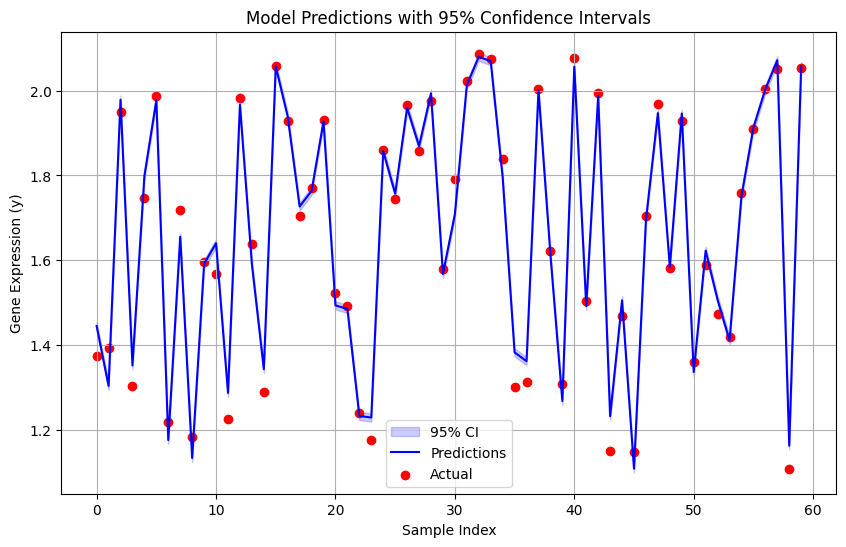

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.fill_between(np.arange(len(y_pred)), conf_int_lower, conf_int_upper, color='b', alpha=0.2, label='95% CI')
plt.plot(np.arange(len(y_pred)), y_pred, linestyle='-', color='b', label='Predictions')
plt.scatter(np.arange(len(y_test)), y_test, color='r', label='Actual')
plt.xlabel('Sample Index')
plt.ylabel('Gene Expression (y)')
plt.title('Model Predictions with 95% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


task 3.o

In [ ]:
import numpy as np
from scipy.stats import norm

# Calculate sample mean and variance for each gene
means = df[genes].mean()
variances = df[genes].var()
n = len(df)

# Define confidence levels
confidence_levels = [0.90, 0.95, 0.99]

# Function to compute confidence intervals
def compute_confidence_interval(mean, variance, n, confidence_level):
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_score * np.sqrt(variance / n)
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Compute confidence intervals for each gene and confidence level
confidence_intervals = {}
for gene in genes:
    confidence_intervals[gene] = {}
    for confidence_level in confidence_levels:
        lower_bound, upper_bound = compute_confidence_interval(means[gene], variances[gene], n, confidence_level)
        confidence_intervals[gene][confidence_level] = (lower_bound, upper_bound)

# Print the results
for gene in genes:
    print(f"Confidence intervals for {gene}:")
    for confidence_level in confidence_levels:
        lower_bound, upper_bound = confidence_intervals[gene][confidence_level]
        print(f"  {int(confidence_level*100)}% CI: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence intervals for x1:
  90% CI: (1.3764, 1.4430)
  95% CI: (1.3700, 1.4494)
  99% CI: (1.3576, 1.4619)
Confidence intervals for x2:
  90% CI: (1.4736, 1.5802)
  95% CI: (1.4634, 1.5904)
  99% CI: (1.4434, 1.6104)
Confidence intervals for x3:
  90% CI: (1.4072, 1.4907)
  95% CI: (1.3992, 1.4987)
  99% CI: (1.3835, 1.5143)
Confidence intervals for x4:
  90% CI: (1.3857, 1.4402)
  95% CI: (1.3805, 1.4454)
  99% CI: (1.3703, 1.4556)
Confidence intervals for x5:
  90% CI: (1.5680, 1.6306)
  95% CI: (1.5620, 1.6366)
  99% CI: (1.5503, 1.6483)


Scale (standard deviation) for x1: 0.3508
Skewness for x1: -0.1348
Scale (standard deviation) for x2: 0.5613
Skewness for x2: -0.2141
Scale (standard deviation) for x3: 0.4396
Skewness for x3: -0.0196
Scale (standard deviation) for x4: 0.2867
Skewness for x4: -0.1663
Scale (standard deviation) for x5: 0.3293
Skewness for x5: -0.1495


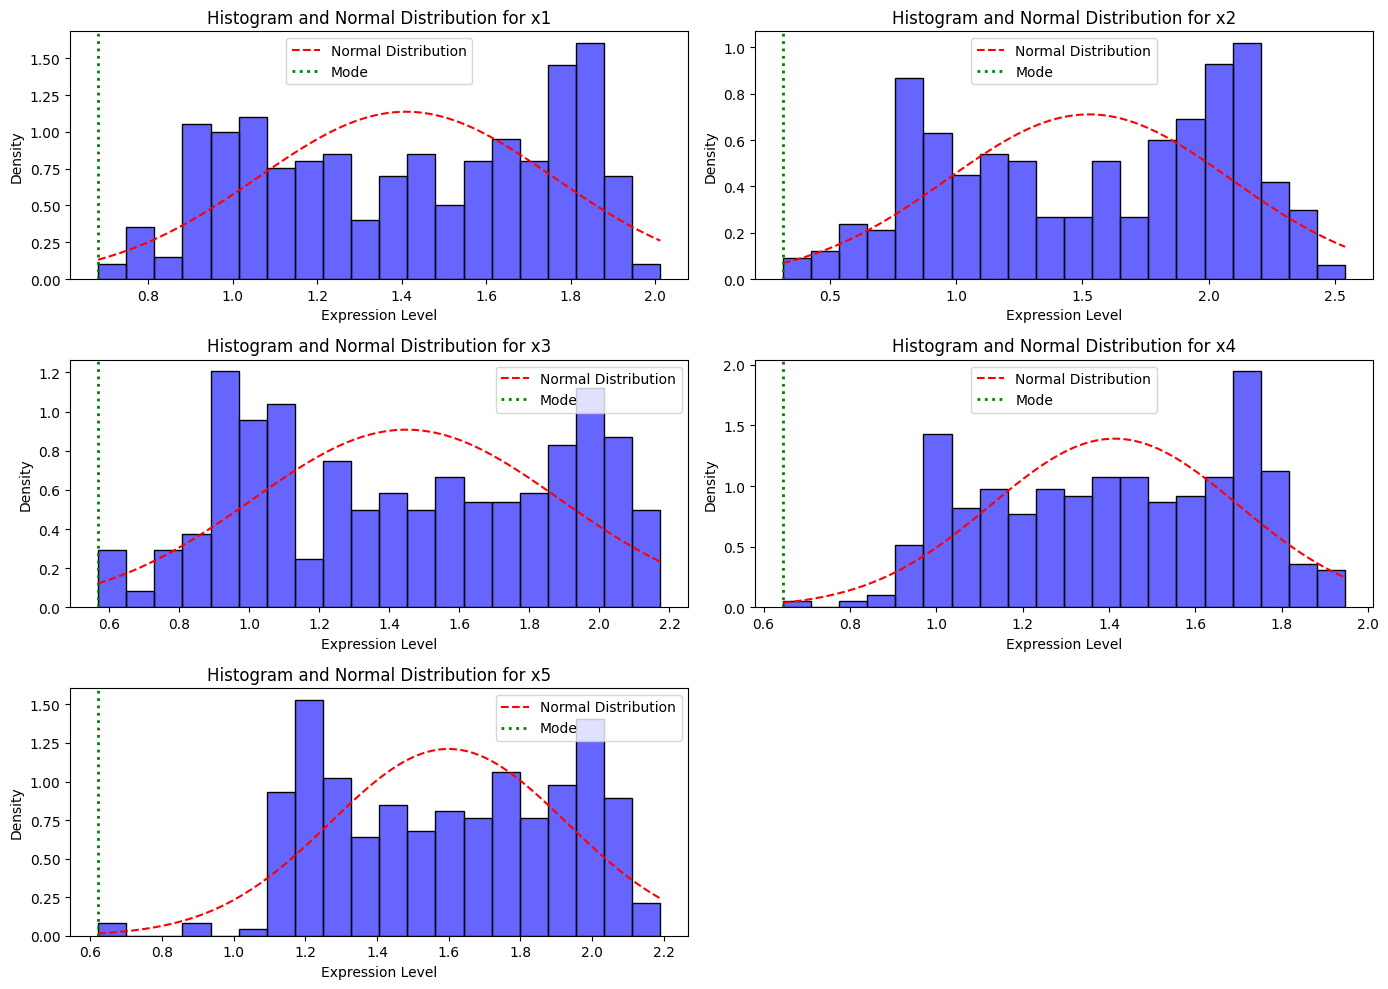

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, mode

# Assuming df is already loaded and columns are renamed to ['time', 'x1', 'x2', 'x3', 'x4', 'x5']

# Define the columns for the genes
genes = ['x1', 'x2', 'x3', 'x4', 'x5']

# Calculate scale (standard deviation) and skewness for each gene
scales = df[genes].std()
skewnesses = df[genes].apply(skew)

# Print scale and skewness
for gene in genes:
    print(f"Scale (standard deviation) for {gene}: {scales[gene]:.4f}")
    print(f"Skewness for {gene}: {skewnesses[gene]:.4f}")

# Plot histograms and overlay normal distributions
plt.figure(figsize=(14, 10))
for i, gene in enumerate(genes):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[gene], kde=False, stat='density', bins=20, color='blue', alpha=0.6)

    # Overlay normal distribution
    mean = df[gene].mean()
    std_dev = df[gene].std()
    x = np.linspace(df[gene].min(), df[gene].max(), 100)
    plt.plot(x, norm.pdf(x, mean, std_dev), 'r--', label='Normal Distribution')

    # Mark the mode
    mode_value = mode(df[gene])[0]
    plt.axvline(mode_value, color='g', linestyle='dotted', linewidth=2, label='Mode')

    plt.title(f'Histogram and Normal Distribution for {gene}')
    plt.xlabel('Expression Level')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
